In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pickle
from scipy.optimize import curve_fit
from scipy.stats import norm

from LatexConstants import *

In [2]:
def gaussian(x, mu, sigma, N):
    return N*np.exp(-(x-mu)**2/(2*sigma**2))

In [4]:
run = '2124'
in_dir = '../reco/'
output_dir = '../ThesisPlots/'
histo_dir = in_dir + 'histos/' + run + '/'

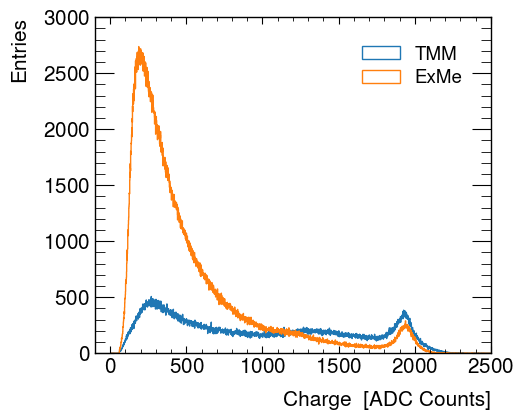

In [22]:
title = 'Charge'
dir = in_dir 
with open(f"{histo_dir}{title}P0_RM1.pkl", "rb") as file1:
    TMM = pickle.load(file1)

with open(f"{histo_dir}{title}P2_M01.pkl", "rb") as file2:
    ExMe = pickle.load(file2)

# with open(f"{dir}/histos/{run}/{title}_1st_coordP0_RM1.pkl", "rb") as file2:
#     TMM_1st = pickle.load(file2)

TMM = np.array(TMM)
ExMe = np.array(ExMe)

plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
fontsize = 15
bins = 2500
range = (0, 2500)

n, bins, patches = plt.hist(TMM,histtype='step', bins = bins, range = range, label = 'TMM', density = False)
# n, bins, patches = plt.hist(TMM_1st, histtype='step', bins = bins,range = range, label = 'P2_M01', density=True)
n, bins, patches = plt.hist(ExMe, histtype='step', bins = bins,range = range, label = 'ExMe', density=False)


plt.xlabel(f'{title}  [ADC Counts]', fontsize = fontsize)
plt.ylabel('Entries', fontsize = fontsize)
plt.xlim(range[0]-100,range[1])

plt.legend(fontsize = 0.9*fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)
# plt.yscale('log')
# plt.xscale('log')

if 'NoCuts' in in_dir:
    x = ax.get_xlim()[1]
    y = ax.get_ylim()[1]
    plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
             horizontalalignment = 'right', verticalalignment = 'bottom')

plt.tight_layout()
# plt.savefig(f'{output_dir}{run}_{title}.pdf', dpi = 600)
# plt.savefig(f'{output_dir}{run}_{title}.png', dpi = 600)
plt.show()

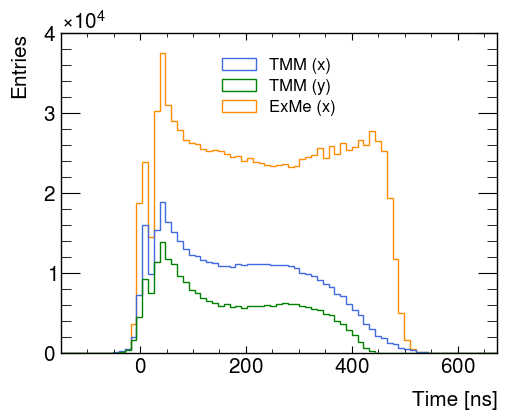

In [5]:
run = '2124'
title = 'Time'
with open(f"{histo_dir}{title}P0_RM1.pkl", "rb") as file1:
    TMM = pickle.load(file1)

with open(f"{histo_dir}{title}P2_M01.pkl", "rb") as file2:
    ExMe = pickle.load(file2)

with open(f"{histo_dir}{title}_1st_coordP0_RM1.pkl", "rb") as file2:
    TMM_1st = pickle.load(file2)

TMM = np.array(TMM)
ExMe = np.array(ExMe)

plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
fontsize = 15
bins = 75
hrange = (-150, 675)

n, bins, patches = plt.hist(TMM,histtype='step', bins = bins, range = hrange, label = 'TMM (x)', 
                            density = False, zorder = 2,  lw = 1, color = 'royalblue')
n, bins, patches = plt.hist(TMM_1st, histtype='step', bins = bins,range = hrange, label = 'TMM (y)', 
                            density=False, zorder = 3,  lw = 1, color = 'green')
n, bins, patches = plt.hist(ExMe, histtype='step', bins = bins,range = hrange, label = 'ExMe (x)', 
                            density=False, zorder = 0 , lw = 1, color = 'darkorange')


plt.xlabel(f'{title} [ns]', fontsize = fontsize)
plt.ylabel('Entries', fontsize = fontsize)
plt.xlim(hrange)
# plt.ylim(0,0.004)

plt.legend(fontsize = 0.8*fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)

if 'NoCuts' in in_dir:
    x = ax.get_xlim()[1]
    y = ax.get_ylim()[1]
    plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
             horizontalalignment = 'right', verticalalignment = 'bottom')

plt.tight_layout()
# plt.savefig(f'{output_dir}{run}_{title}.pdf', dpi = 600)
# plt.savefig(f'{output_dir}{run}_{title}.png', dpi = 600)
plt.show()

In [13]:
# from iminuit import Minuit
# from iminuit.cost import LeastSquares

# def FermiDirac(x, max, thalf, slope, shift):
#     return (max/(1+np.exp(-(x-thalf)/slope))) + shift

# def DoubleFermiDiracFit(times, show_fit = False):
    
#     nbins = 500
#     hist_range = (-100, 675)
#     counts, bin_edges = np.histogram(times, bins=nbins, range=hist_range, density = False)

#     bin_width = bin_edges[1]-bin_edges[0]
#     bin_centers = bin_edges[0:-1] + 0.5*bin_width

#     # this is needed otherwise we get nan for fit parameter errors.
#     # Why? I have absolutely no idea.
#     x = [bin_centers[i] for i in range(len(bin_centers)) if counts[i] != 0]
#     counts = [counts[i] for i in range(len(counts)) if counts[i] != 0]
#     err_y = [0.1*count for count in counts]

#     # plt.scatter(x, counts)


#     #for the rising part fit we take the first 25% of the data
#     fraction = 0.5
#     end_idx = np.argmax(x[0:int(fraction*len(x))])
#     ls = LeastSquares(x[0:end_idx], counts[0:end_idx], err_y[0:end_idx], FermiDirac)
#     m = Minuit(ls, max = counts[end_idx], thalf= x[end_idx],slope = 10, shift = counts[0])
#     m.fixed["shift"] = True
#     m.migrad()
#     m.hesse()

#     start_idx = np.argmax(x[int(len(x)*(1-fraction)):])
#     ls1 = LeastSquares(x[start_idx:], counts[start_idx:], err_y[start_idx:], FermiDirac)
#     m1 = Minuit(ls1, max = -m.values[0], thalf= 500,slope = 10, shift = 2*m.values[0])
#     m1.fixed["max"] = True
#     m1.migrad()
#     m1.hesse()

#     if show_fit == True:
#         x_low = np.linspace(-100, 250, 100)
#         x_high = np.linspace(250, 775, 200)
#         plt.hist(times, bins=nbins, range=hist_range, density = False, histtype = 'step', color = 'darkorange', label = 'ExMe')
#         # plt.scatter(x, counts)
#         plt.plot(x_low, FermiDirac(x_low, *m.values), color = 'red', lw = 2, label = 'BiFermiDirac Fit')
#         plt.plot(x_high, FermiDirac(x_high, *m1.values), color = 'red', lw = 2)
#         plt.xlabel('Time [ns]')
#         plt.ylabel('Entries (Normalized)')
#         # plt.show()
    
#     return m.values, m.errors, m1.values, m1.errors

In [12]:
# plt.style.use(hep.style.ATLAS)
# plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
# fontsize = 15
# bins = 75
# hrange = (-150, 675)



# a = DoubleFermiDiracFit(list(ExMe), True)


# plt.xlabel(f'{title} [ns]', fontsize = fontsize)
# plt.ylabel('Entries', fontsize = fontsize)
# plt.xlim(hrange)
# # plt.ylim(0,0.004)

# plt.legend(fontsize = 0.8*fontsize)
# plt.tick_params(axis='both', which='major', labelsize=0.9*fontsize)
# ax = plt.gca()
# ax.yaxis.offsetText.set_fontsize(fontsize)

# if 'NoCuts' in in_dir:
#     x = ax.get_xlim()[1]
#     y = ax.get_ylim()[1]
#     plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
#              horizontalalignment = 'right', verticalalignment = 'bottom')


# plt.legend(fontsize = 0.8*fontsize)
# plt.tight_layout()
# plt.savefig(f'../ThesisPlots/FinalPlots/ExampleTimeFit{run}.pdf', dpi = 600)
# plt.savefig(f'../ThesisPlots/FinalPlots/ExampleTimeFit{run}.png', dpi = 600)
# plt.show()

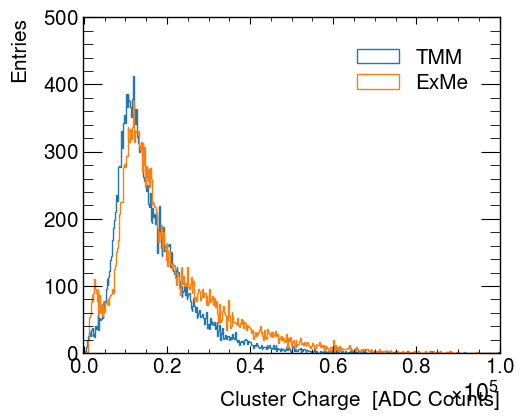

In [24]:
run = '2124'
title = 'Cluster Charge'

with open(f"{histo_dir}{title}P0_RM1.pkl", "rb") as file1:
    TMM = pickle.load(file1)

with open(f"{histo_dir}{title}P2_M01.pkl", "rb") as file2:
    ExMe = pickle.load(file2)

# with open(f"{dir}/histos/{run}/{title}_1st_coordP0_RM1.pkl", "rb") as file2:
#     TMM_1st = pickle.load(file2)

TMM = np.array(TMM)
ExMe = np.array(ExMe)

plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
fontsize = 15
bins = 500
range = (-100, 10**5)

n, bins, patches = plt.hist(TMM,histtype='step', bins = bins, range = range, label = 'TMM', density = False)
# n, bins, patches = plt.hist(TMM_1st, histtype='step', bins = bins,range = range, label = 'P2_M01', density=True)
n, bins, patches = plt.hist(ExMe, histtype='step', bins = bins,range = range, label = 'ExMe', density=False)


plt.xlabel(f'{title}  [ADC Counts]', fontsize = fontsize)
plt.ylabel('Entries', fontsize = fontsize)
plt.xlim(range[0],range[1])

plt.legend(fontsize = fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)
# plt.yscale('log')
# plt.xscale('log')

if 'NoCuts' in in_dir:
    x = ax.get_xlim()[1]
    y = ax.get_ylim()[1]
    plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
             horizontalalignment = 'right', verticalalignment = 'bottom')

plt.tight_layout()
# plt.savefig(f'{output_dir}{run}_{title}_noCuts.png', dpi = 600)
# plt.savefig(f'{output_dir}{run}_{title}_noCuts.pdf', dpi = 600)
plt.show()

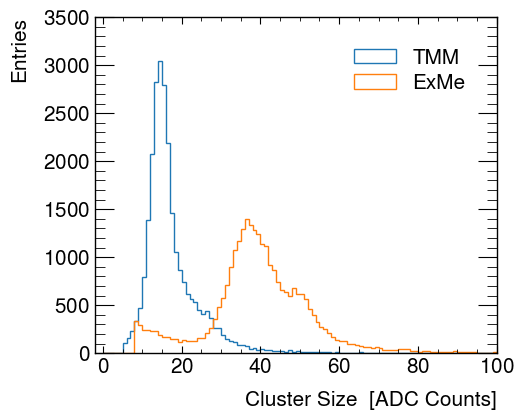

In [25]:
run = '2124'
title = 'Cluster Size'

with open(f"{histo_dir}{title}P0_RM1.pkl", "rb") as file1:
    TMM = pickle.load(file1)

with open(f"{histo_dir}{title}P2_M01.pkl", "rb") as file2:
    ExMe = pickle.load(file2)

# with open(f"{dir}/histos/{run}/{title}_1st_coordP0_RM1.pkl", "rb") as file2:
#     TMM_1st = pickle.load(file2)

TMM = np.array(TMM)
ExMe = np.array(ExMe)

plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
fontsize = 15
bins = 100
range = (0, 100)

n, bins, patches = plt.hist(TMM,histtype='step', bins = bins, range = range, label = 'TMM', density = False)
# n, bins, patches = plt.hist(TMM_1st, histtype='step', bins = bins,range = range, label = 'P2_M01', density=True)
n, bins, patches = plt.hist(ExMe, histtype='step', bins = bins,range = range, label = 'ExMe', density=False)


plt.xlabel(f'{title}  [ADC Counts]', fontsize = fontsize)
plt.ylabel('Entries', fontsize = fontsize)
plt.xlim(range[0]-2,range[1])

plt.legend(fontsize = fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)
# plt.yscale('log')
# plt.xscale('log')

if 'NoCuts' in in_dir:
    x = ax.get_xlim()[1]
    y = ax.get_ylim()[1]
    plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
             horizontalalignment = 'right', verticalalignment = 'bottom')

plt.tight_layout()
# plt.savefig(f'{output_dir}{run}_{title}_10holesallowed.png', dpi = 600)
# plt.savefig(f'{output_dir}{run}_{title}_10holesallowed.pdf', dpi = 600)
plt.show()

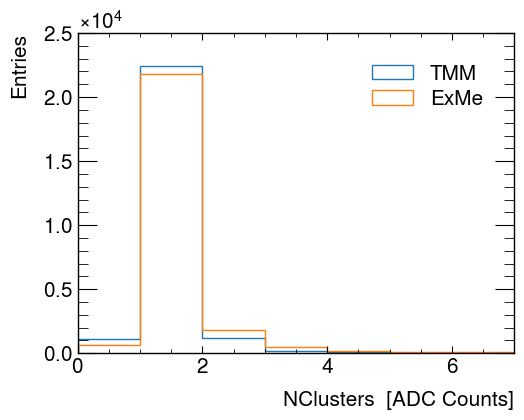

In [26]:
run = '2124'
title = 'NClusters'

with open(f"{histo_dir}{title}P0_RM1.pkl", "rb") as file1:
    TMM = pickle.load(file1)

with open(f"{histo_dir}{title}P2_M01.pkl", "rb") as file2:
    ExMe = pickle.load(file2)

# with open(f"{dir}/histos/{run}/{title}_1st_coordP0_RM1.pkl", "rb") as file2:
#     TMM_1st = pickle.load(file2)

TMM = np.array(TMM)
ExMe = np.array(ExMe)

plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
fontsize = 15
bins = 7
range = (0, 7)

n, bins, patches = plt.hist(TMM,histtype='step', bins = bins, range = range, label = 'TMM', density = False)
# n, bins, patches = plt.hist(TMM_1st, histtype='step', bins = bins,range = range, label = 'P2_M01', density=True)
n, bins, patches = plt.hist(ExMe, histtype='step', bins = bins,range = range, label = 'ExMe', density=False)


plt.xlabel(f'{title}  [ADC Counts]', fontsize = fontsize)
plt.ylabel('Entries', fontsize = fontsize)
plt.xlim(range[0],range[1])

plt.legend(fontsize = fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)
# plt.yscale('log')
# plt.xscale('log')

if 'NoCuts' in in_dir:
    x = ax.get_xlim()[1]
    y = ax.get_ylim()[1]
    plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
             horizontalalignment = 'right', verticalalignment = 'bottom')

plt.tight_layout()
# plt.savefig(f'{output_dir}{run}_{title}_10holeallowed.pdf', dpi = 600)
# plt.savefig(f'{output_dir}{run}_{title}_10holeallowed.png', dpi = 600)
plt.show()

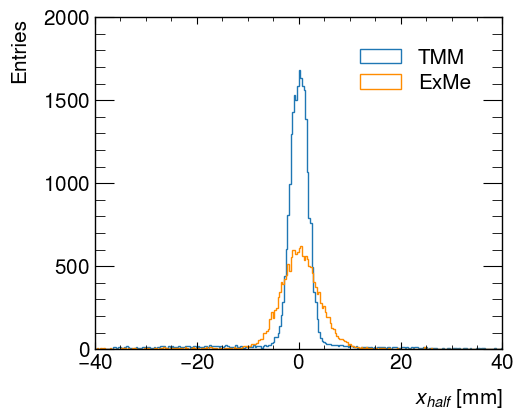

In [29]:
run = '2124'
title = 'xhalf'
title2 = 'Centroid'

with open(f"{histo_dir}{title2}P0_RM1.pkl", "rb") as file1:
    TMM = pickle.load(file1)

with open(f"{histo_dir}{title}P2_M01.pkl", "rb") as file2:
    ExMe = pickle.load(file2)

# with open(f"../2124NoCutsWith1stCoord/histos/{run}/{title}_1st_coordP0_RM1.pkl", "rb") as file2:
#     TMM_1st = pickle.load(file2)

run = '2124'
title = 'Centroid'
dir = '../reco/histos/' + run + '/' + title

with open(dir + 'P0_RM1' + '.pkl', 'rb') as file:
    TMMCentroid = np.array(pickle.load(file))

with open(dir + 'P2_M01' + '.pkl', 'rb') as file:
    ExMeCentroid = np.array(pickle.load(file))

TMM_mean = TMMCentroid.mean()
ExMe_mean = ExMeCentroid[(ExMeCentroid>200) & (ExMeCentroid<230)].mean()
TMM_std = TMMCentroid.std()
ExMe_std = ExMeCentroid.std()

TMM = np.array(TMM) - TMM_mean
ExMe = np.array(ExMe) - ExMe_mean

plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
fontsize = 15
bins = 250
range = (-40, 40)

n, bins, patches = plt.hist(TMM,histtype='step', bins = bins, range = range, label = 'TMM', density = False)
n, bins, patches = plt.hist(ExMe, histtype='step', bins = bins,range = range, label = 'ExMe', density = False, color = 'darkorange')

plt.xlabel(r'$x_{half}$ [mm]', fontsize = fontsize)
plt.ylabel('Entries', fontsize = fontsize)
plt.xlim(range[0],range[1])

plt.legend(fontsize = fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)
# plt.yscale('log')
# plt.xscale('log')

title = 'xhalf'
if 'NoCuts' in in_dir:
    x = ax.get_xlim()[1]
    y = ax.get_ylim()[1]
    plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
             horizontalalignment = 'right', verticalalignment = 'bottom')

plt.tight_layout()
plt.savefig(f'{output_dir}{run}_{title}_ExMe.png', dpi = 600)
plt.savefig(f'{output_dir}{run}_{title}_ExMe.pdf', dpi = 600)
plt.show()

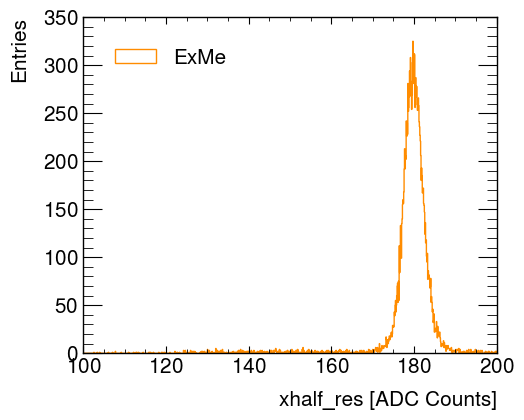

In [28]:
run = '2019'
title = 'xhalf_res'


# with open(f"{histo_dir}{title2}P0_RM1.pkl", "rb") as file1:
    # TMM = pickle.load(file1)

with open(f"{histo_dir}{title}P2_M01.pkl", "rb") as file2:
    ExMe = pickle.load(file2)

# TMM_mean = TMMCentroid.mean()
# ExMe_mean = ExMeCentroid[(ExMeCentroid>200) & (ExMeCentroid<230)].mean()
# TMM_std = TMMCentroid.std()
# ExMe_std = ExMeCentroid.std()

# TMM = np.array(TMMCentroid) - TMM_mean
# ExMe = np.array(ExMeCentroid) - ExMe_mean

plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
fontsize = 15
bins = 1000
range = (100, 200)

# n, bins, patches = plt.hist(TMM,histtype='step', bins = bins, range = range, label = 'TMM', density = False)
n, bins, patches = plt.hist(ExMe, histtype='step', bins = bins,range = range, label = 'ExMe', density= False, color = 'darkorange')

plt.xlabel(f'{title} [ADC Counts]', fontsize = fontsize)
plt.ylabel('Entries', fontsize = fontsize)
plt.xlim(range[0],range[1])

plt.legend(fontsize = fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)
# plt.yscale('log')
# plt.xscale('log')

plt.tight_layout()
if 'NoCuts' in in_dir:
    x = ax.get_xlim()[1]
    y = ax.get_ylim()[1]
    plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
             horizontalalignment = 'right', verticalalignment = 'bottom')
# plt.savefig(f'{output_dir}{run}_{title}_ExMe.pdf', dpi = 600)
# plt.savefig(f'{output_dir}{run}_{title}_ExMe.png', dpi = 600)
plt.show()

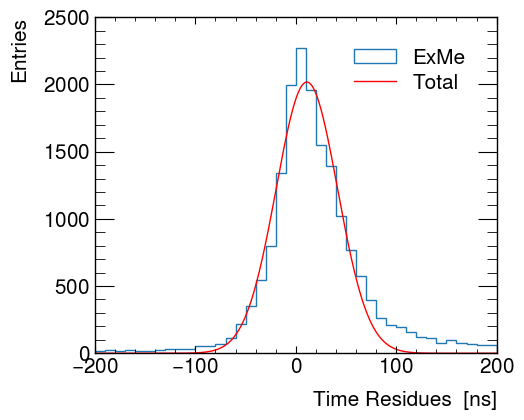

In [47]:
run = '2124'
title = 'Time Residues'

# with open(f"{histo_dir}{title}P0_RM1.pkl", "rb") as file1:
#     TMM = pickle.load(file1)

with open(f"{histo_dir}{title}P2_M01.pkl", "rb") as file2:
    ExMe = pickle.load(file2)

# with open(f"{dir}/histos/{run}/{title}_1st_coordP0_RM1.pkl", "rb") as file2:
#     TMM_1st = pickle.load(file2)

# TMM = np.array(TMM)
# ExMe = np.array(ExMe)

plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
fontsize = 15
bins = 40
range = (-200, 200)

# n, bins, patches = plt.hist(TMM,histtype='step', bins = bins, range = range, label = 'TMM', density = False)
# n, bins, patches = plt.hist(TMM_1st, histtype='step', bins = bins,range = range, label = 'P2_M01', density=True)
n, bins, patches = plt.hist(ExMe, histtype='step', bins = bins,range = range, label = 'ExMe', density=False)

w = bins[1]-bins[0]
a = bins[0]
b = bins[-2]
x = bins[0:-1] + 0.5*w
# plt.scatter(x,n, marker='.')
# par, cov = curve_fit(gaussian, x, n, p0 = [1,1,1,1,1,1, 0.1, 0.11])
# par, cov = curve_fit(gaussian, x, n, p0 = (22, 1 , 3000))
par, cov = curve_fit(gaussian, x, n, p0 = (23, 1 , 3000))
x = np.linspace(-200,200, 1000)

plt.plot(x, gaussian(x, *par), color = 'red', lw = 1, label = 'Total')

plt.xlabel(f'{title}  [ns]', fontsize = fontsize)
plt.ylabel('Entries', fontsize = fontsize)
plt.xlim(range[0],range[1])

plt.legend(fontsize = fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(fontsize)
# plt.yscale('log')
# plt.xscale('log')

if 'NoCuts' in in_dir:
    x = ax.get_xlim()[1]
    y = ax.get_ylim()[1]
    plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
             horizontalalignment = 'right', verticalalignment = 'bottom')

plt.tight_layout()
# plt.savefig(f'{output_dir}{run}_{title}_10holeallowed.pdf', dpi = 600)
# plt.savefig(f'{output_dir}{run}_{title}_10holeallowed.png', dpi = 600)
plt.show()